In [ ]:
pip install tensorflow

#Erstellung der DataFrames für die Nutzung des Neuronalen Netzwerks.

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
import tensorflow as tf
from keras.models import Sequential
from keras.layers import GRU, Dense, Activation
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#Datenmanipulation für das Neuronale Netzwerk.

In [23]:
# Extrahieren die Datensätze für die Nutzung
pfad = "/content/Datensatz1.xlsx"
Datensatz1 = pd.read_excel(pfad)

pfad = "/content/Datensatz3.xlsx"
Datensatz3 = pd.read_excel(pfad)

pfad = "/content/Datensatz4.xlsx"
Datensatz4 = pd.read_excel(pfad)

pfad = "/content/Datensatz5.xlsx"
Datensatz5 = pd.read_excel(pfad)

pfad = "/content/Datensatz6.xlsx"
Datensatz6 = pd.read_excel(pfad)

pfad = "/content/Datensatz_krank.xlsx"
Datensatz_krank = pd.read_excel(pfad)

In [24]:
#Das sind die Ergebnisse die benötigt werden zu jedem Datensatz.
ergebnisse = {
    'Krankheitszustand': [1, 1, 1, 1, 1, 0]
}

labels = pd.DataFrame(ergebnisse)

In [25]:
# Organisieren der Daten und Labels. Verknüpfen die Datensätze jeweils mit einem Label.
data_frames = [Datensatz1, Datensatz3, Datensatz4, Datensatz5, Datensatz6, Datensatz_krank]
data_with_labels = []

for i, df in enumerate(data_frames):
    label = labels.loc[i, 'Krankheitszustand']  # Das Label für den aktuellen Datensatz
    data_with_labels.append((df, label))

In [ ]:
# Ausgabe der ersten paar Einträge in data_with_labels
for i in range(6):  # Zeige nur die ersten 5 Einträge zur Demonstration
    print("Datensatz {}: Label - {}".format(i+1, data_with_labels[i][1]))
    print(data_with_labels[i][0])
    print()

In [27]:
X_train = np.array([df.values for df, _ in data_with_labels[:5]])  # Extrahieren der Daten aus den DataFrames
X_train = X_train[:, :, :3]   # Die ersten drei Spalten werden extrahiert (Frequenz, Amplitude, Phase)
y_train = np.array([label for _, label in data_with_labels[:5]])  # Extrahieren der Labels
X_test = np.array([Datensatz_krank.values])
X_test = X_test[:, :, :3]
label_entry = labels['Krankheitszustand'].iloc[5]
y_test = np.array(label_entry)

# Aufbau des neuronalen Netzwerks

In [28]:
# Netzwerksparameter
input_size = 3
hidden_size = 256
num_layers = 2
num_classes = 2
batch_size = 3
num_epochs = 50
learning_rate = 0.0003
threshold = 0.5

In [29]:
# Modell erstellen
model = Sequential([
    GRU(hidden_size, input_shape=(301, input_size), return_sequences=True),
    GRU(hidden_size, return_sequences=True),
    GRU(hidden_size, return_sequences=False),
    Dense(hidden_size, input_shape=(hidden_size,), activation='relu'),
    Dense(hidden_size, input_shape=(hidden_size,), activation='relu'),
    Dense(num_classes, activation='sigmoid')
])

In [30]:
# Loss-Funktion, Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

# Trainieren des neuronalen Netzwerks

In [31]:
history = model.fit(X_train, y_train,epochs= num_epochs, batch_size= batch_size)

Epoch 1/50
2/2 [==============================] - 9s 1s/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 0.0646 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.0183 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 3.6477e-04 - accuracy: 0.6000
Epoch 7/50
2/2 [==============================] - 3s 2s/step - loss: 1.3810e-04 - accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 3s 2s/step - loss: 5.9823e-05 - accuracy: 1.0000
Epoch 9/50
2/2 [==============================] - 2s 1s/step - loss: 3.0477e-05 - accuracy: 1.0000
Epoch 10/50
2/2 [==============================] - 2s 1s/step - loss: 1.7224e-05 - accuracy: 1.0000
Epoch 11/

# Evaluation

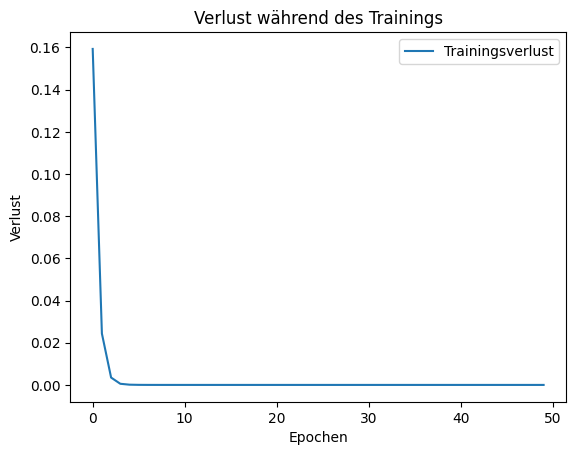

In [12]:
# Plotten die Veränderung der Loss abhängig von Epoch.
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.title('Verlust während des Trainings')
plt.legend()
plt.show()

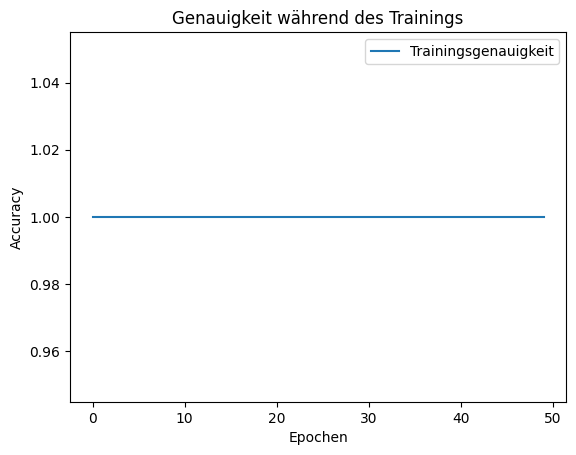

In [13]:
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
#plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.title('Genauigkeit während des Trainings')
plt.legend()
plt.show()

In [ ]:
result = model.evaluate(X_train, y_train)
loss, accuracy = result  # Hier wird das Tupel aufgelöst
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Vorhersage einer Klassifikation

In [19]:
# Vorhersage machen. Das sind die Outputs für die Vorhersage von X_test.
binäre_vorhersage = (model.predict(X_test) > threshold).astype(int)
class_labels = np.where(binäre_vorhersage == 1, "Gesund", "Krank")
print(class_labels)

1/1 [==============================] - 0s 98ms/step
[['Gesund']]


Nach der Vorhersage, ermittelt wird wie Präzise das Neuronale Netzwerk den Output vorhergesagt hat. Dazu bedienen wir uns unterschiedliche Metriken, wie:


1.   Accuracy
2.   Precision
3.   Recall
4.   F1-Score

Das Problem ist jedoch, dass wir keine Sammlung von y_test haben sondern nur eine einzelne Vorhersage. Damit können diese unterschiedlichen Metriken nicht verwendet werden.

In [ ]:
# Berechne die Genauigkeit
accuracy = accuracy_score(y_test, binäre_vorhersage)
print("Genauigkeit auf Testdaten:", accuracy)

In [ ]:
# Berechne Precision, Recall und F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, binäre_vorhersage, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

In [ ]:
# Vorhersage Plotten!!!
plt.scatter(X_test[:, 0], X_test[:, 1], c=binäre_vorhersage, cmap='viridis', label=class_labels)
plt.xlabel('Amplitude')
plt.ylabel('Frequenz')
plt.title('Binary Classification')
#plt.legend(["Gesund", "Krank"])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')